In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statistics as st

class Stock:
    def __init__(self, stock_PV, expected_return, volatility,net_income,shares_outstanding):
        self.S    = stock_PV #현재가격
        self.r  = expected_return # 수익률
        self.vol  = volatility # 변동성
        self.FV    = stock_PV # 미래가격 
        self.NI = net_income # 순수익
        self.shares_outstanding = shares_outstanding #주식수
        
        
    def after_years_stock_value(self,year,seed,size): #주가변동함수입니다.
        np.random.seed(seed) #시드설정
        z = np.random.normal(0, 1, size) #정규분포 size만큼 추출
        self.FV = self.S * np.exp((self.r-(self.vol**2)/2)*year)*np.exp(self.vol*(year**(1/2))*z)
        return(self.FV)
    
    def sample_mean_and_std(self,year,seed,size): #표본 평균, 표본 표준편차 함수입니다.
        self.after_years_stock_value(year,seed,size)
        self.mean = self.FV.mean()
        self.var = self.FV.var(ddof=1) 
        print('표본 평균 : {}'.format(self.mean))
        print('표본 분산 : {}'.format(self.var))
        
        
    def nth_year_Future_value_graph(self,year,seed,size): #n년 후의 주가 예측분석 및 평균 값 그래프 함수입니다.
        self.sample_mean_and_std(year,seed,size)          # 평균 및 표본 표준편차 함수
        self.middle = st.median(self.FV)
        plt.plot(self.FV,'ko',label = '{} years FV'.format(year))                            #함수 그래프 
        plt.axhline(y=self.middle, color='b', linestyle='-',label = 'price_middle = {}'.format(self.middle)) #중앙값 수평선 그래프입니다.
        plt.axhline(y=self.mean, color='r', linestyle='-',label = 'price_mean = {}'.format(self.mean)) #평균 수평선 그래프입니다.
        plt.title("Stock Price Forecast Graph in {} Years(sample_size = {})".format(year,size))     # 제목
        plt.xlabel('number of trials')                    #x축 설명입니다.
        plt.ylabel('Price')                               #y축 설명입니다
        plt.legend()                                      # 범례 생성 함수
        plt.grid()                                        #격자 생성입니다.
        plt.show()
        
    def nth_year_future_value_meadle_graph(self, year, seed, size): #n년까지의 중앙값 변화를 그래프로 나타낸 함수입니다.
        _middle = []                           #중앙값을 따로 추출하는 []리스트 설정입니다.
        for i in range(1, year + 1):           #range
            self.after_years_stock_value(i,seed,size) 
            self.middle = st.median(self.FV)
            _middle.append(self.middle)
        plt.plot(range(1, year + 1), _middle, 'o-') #x축을 1년, y축을 평균 가격으로 해서 그래프를 진행했습니다.
        plt.title("{}th_year_future_value_meadle_graph(sample_size = {})".format(year,size)) # 제목
        plt.xlabel('Year')                     #x축 설명입니다. 
        plt.ylabel('Stock Price')              #y축 설명입니다. 
        plt.xticks(range(1,year+1))            #x축 1년 단위로 표시하는 함수입니다. 
        plt.yticks(_middle)                    #y축 중앙값 단위로 표시하는 함수입니다. 
        plt.grid()                             #격자표시입니다.
        plt.show()        

    def nth_year_future_value_mean_graph(self, year, seed, size):#n년까지의 평균값 및 하위 상위 30%변화를 그래프로 나타낸 함수입니다.
        _means = []                                              #평균값을 담는 리스트입니다.
        _top = []                                                #상위 30%에 속하는 값을 담는 리스트입니다.
        _low = []                                                #하위 30%에 속하는 값을 담는 리스트입니다.
        _num = int(size/3)                                      #30%를 대략적으로 표현했습니다.
        for i in range(1, year + 1):                            # for을 활용하여 년도 별로 값을 구했습니다.
            self.after_years_stock_value(i,seed,size)            #i년 후 평균 가격 함수 예측하는 그래프입니다.
            self.FV.sort()                                       # sort를 통해 크기 순으로 정렬했습니다.
            top_30per = self.FV[-_num:]                         #_num번째보다 뒤의 숫자들을 추출했습니다. 
            low_30per = self.FV[:_num]                          #_num번째보다 앞의 숫자들을 추출했습니다.
            _top.append(top_30per.mean())                       #top 리스트에 상위30% 내 평균값을 추가했습니다.
            _low.append(low_30per.mean())                       #low 리스트에 하위30% 내 평균값을 추가했습니다.
            _means.append(self.FV.mean())                       # _means리스트에 평균값을 추가했습니다.
        high_price = int(max(_top))
        plt.plot(range(1, year + 1), _means,'ko-',label = 'price_mean') #x축을 1년, y축을 평균 가격으로 해서 그래프를 진행했습니다.
        plt.plot(range(1, year + 1), _top, 'go-',label = 'price_top30%')#x축을 1년, y축을 상위30% 내 평균값 가격으로 해서 그래프를 진행했습니다.
        plt.plot(range(1, year + 1), _low, 'bo-',label = 'price_low30%')#x축을 1년, y축을 하위30% 내 평균값 가격으로 해서 그래프를 진행했습
        plt.title("{}th_year_future_value_mean_graph(sample_size = {})".format(year,size)) # 제목
        plt.xlabel('Year')                                      #x축 설명입니다. 
        plt.ylabel('Mean Stock Price')                          #y축 설명입니다. 
        plt.xticks(range(1,year+1))                            #x축 1년 단위로 나누는 함수입니다. 
        plt.grid()                                               #격자표시입니다.
        plt.legend()
        plt.show()                                

    def PV_per(self): #per을 추출하는 함수입니다. 
        self.eps = self.NI/self.shares_outstanding  #eps = 주당 순이익 ex) 1주당 1000원의 순이익
        self.per = self.S/self.eps #per입니다. 
        print("PER: {}".format(self.per))
        

표본 평균 : 110051.87559788222
표본 분산 : 10299356.70212387


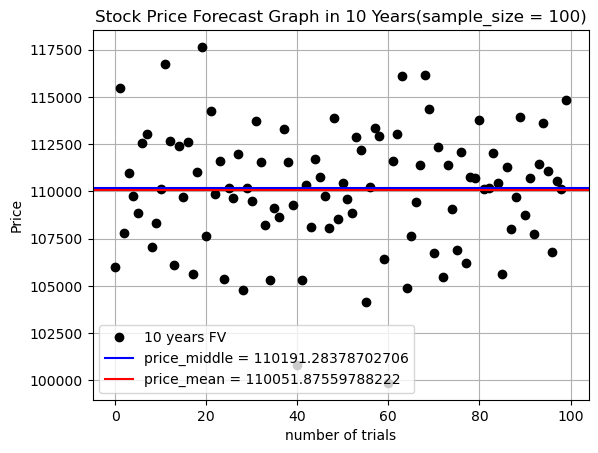

In [2]:
samsung = Stock(70000,0.045,0.01,640200000000,96633962)
samsung.nth_year_Future_value_graph(10,54454,100)

In [3]:
samsung = Stock(70000,0.045,0.01,640200000000,96633962)
samsung.PV_per()

PER: 10.566037706966574


In [4]:
samsung.after_years_stock_value(10,4682354,10)
print(samsung.FV)

samsung.sample_mean_and_std(10,4682354,10)



[103353.77596114 112913.61169073 108483.32146179 111442.86571885
 106981.0400464  111865.42172026 110286.56409722 112509.52781784
 112908.0374072  110039.93563008]
표본 평균 : 110078.41015515062
표본 분산 : 9379351.496457415


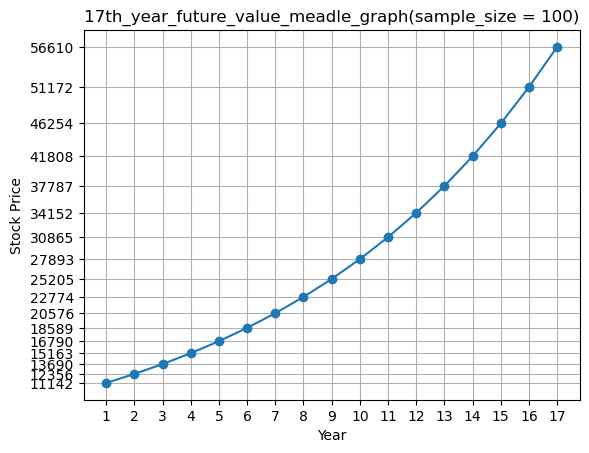

In [5]:
samsung = Stock(10000,0.12,0.2,10000,100000)
samsung.nth_year_future_value_meadle_graph(17,46562354,100)

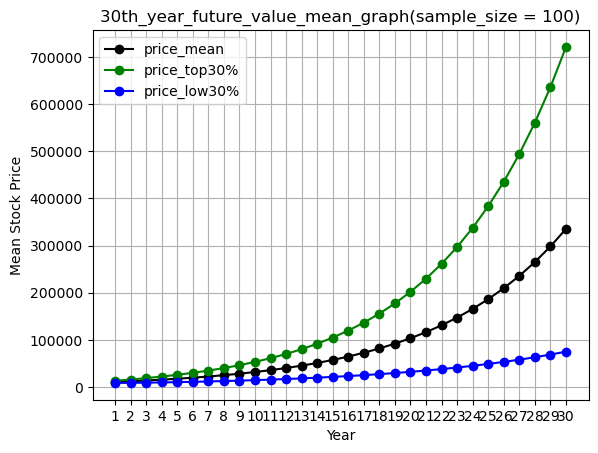

In [6]:
samsung.nth_year_future_value_mean_graph(30,46562354,100)

In [7]:
apple = Stock(10000,0.02,0.01,94020000000,96633962)

year = 10
th_mean = 10000*np.exp(0.02*year)
print('이론상 평균: ',th_mean)

th_var = (10000**2)*(np.exp(2*0.02*year))*(np.exp((0.01**2)*year)-1)
print('이론상 분산: ',th_var)

for i in range(1,5):
    t_size = np.power(10,i)
    apple.sample_mean_and_std(10,1,t_size)
    mean_error = abs(apple.mean - th_mean)
    var_error = abs(apple.var - th_var)
    print('n이 {}일 때, 평균간 오차: {}'.format(t_size,mean_error))
    print('n이 {}일 때, 분산간 오차: {}'.format(t_size,var_error))

이론상 평균:  12214.027581601698
이론상 분산:  149257.08586897765
표본 평균 : 12179.11223592704
표본 분산 : 233852.30451195422
n이 10일 때, 평균간 오차: 34.915345674658965
n이 10일 때, 분산간 오차: 84595.21864297657
표본 평균 : 12236.124795125515
표본 분산 : 118523.99881875415
n이 100일 때, 평균간 오차: 22.097213523817118
n이 100일 때, 분산간 오차: 30733.087050223505
표본 평균 : 12228.793633522764
표본 분산 : 143843.26557355962
n이 1000일 때, 평균간 오차: 14.76605192106581
n이 1000일 때, 분산간 오차: 5413.820295418031
표본 평균 : 12217.789557650873
표본 분산 : 149121.22045921866
n이 10000일 때, 평균간 오차: 3.7619760491743364
n이 10000일 때, 분산간 오차: 135.8654097589897


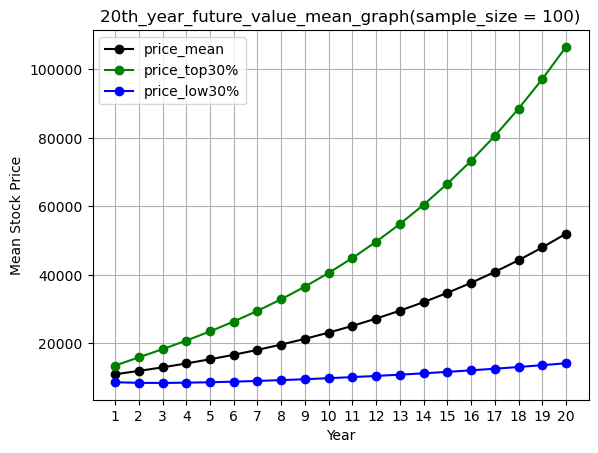

In [8]:
samsung = Stock(10000,0.08,0.2,10000,100000)
samsung.nth_year_future_value_mean_graph(20,0,100)



In [11]:
samsung = Stock(50000,0.08,0.05,1001,51000)
th_var = (50000*2)*(np.exp(2*0.08*10))*(np.exp((0.05**2)*10)-1)
print('이론상 분산: ',th_var)

이론상 분산:  12538.66127849664
